In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys, cv2
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

font = {'size'   : 18}
matplotlib.rc('font', **font)

In [3]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0,n_classes=2, random_state=7816)
X = X.astype(np.float32) # opencv wants 32-bit. Does it matter today, if I use 64-bit?
y = y*2-1 # openCV wants 1 and -1
print(X[0:10, :])
print(y)

[[-2.70996196e-03 -1.55280125e+00]
 [-2.38800335e+00  4.63428050e-01]
 [ 2.90036231e-01 -2.77185011e+00]
 [-1.57948482e+00  1.81154680e+00]
 [-1.42556500e+00 -1.25718908e-02]
 [ 6.68458760e-01 -1.35596573e+00]
 [ 1.65138936e+00  1.93640041e+00]
 [-1.42511380e+00  2.18984317e-02]
 [-9.53875959e-01  1.09136093e+00]
 [ 1.23172134e-01  3.59357037e-02]]
[-1  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1  1  1
  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1  1
 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1
 -1  1 -1 -1]


Text(0,0.5,'y')

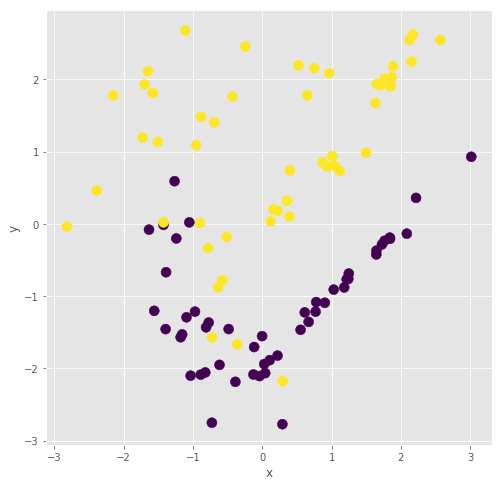

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('x'); plt.ylabel('y')

In [5]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


In [6]:
import cv2
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [7]:
_, y_pred = svm.predict(X_test)
print(pd.DataFrame(np.column_stack((y_test, y_pred)), columns=['test', 'pred']))

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

    test  pred
0    1.0  -1.0
1    1.0   1.0
2    1.0   1.0
3    1.0   1.0
4   -1.0  -1.0
5    1.0   1.0
6    1.0   1.0
7   -1.0   1.0
8    1.0   1.0
9   -1.0  -1.0
10  -1.0  -1.0
11   1.0   1.0
12  -1.0  -1.0
13   1.0   1.0
14   1.0   1.0
15  -1.0   1.0
16  -1.0   1.0
17  -1.0  -1.0
18   1.0   1.0
19   1.0   1.0
0.8


linear train: 0.9125
linear test: 0.8
RBF train: 0.9375
RBF test: 0.9
(373, 392) (373, 392)
(333, 289) (333, 289)
(373, 392) (373, 392)
(333, 289) (333, 289)


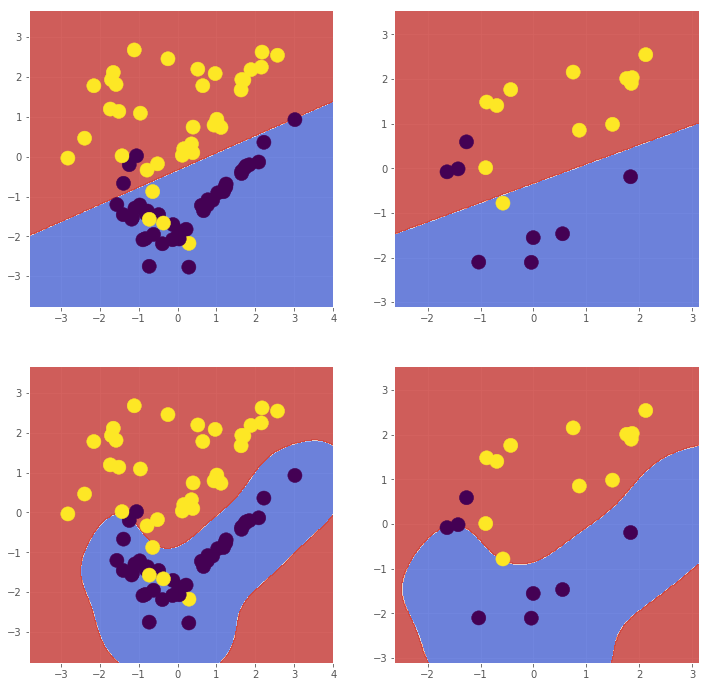

In [15]:
from sklearn import metrics

def plot_decision_boundary(svm, X_test, y_test, plot_idx):
    x_min, x_max = X_test[:,0].min()-1, X_test[:,0].max()+1
    y_min, y_max = X_test[:,1].min()-1, X_test[:,1].max()+1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(xx.shape, yy.shape) # generate 333 x, 289 y. It is a grid!
    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)] # column1, column2
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape) # zz are the values at every grid points!
    plt.subplot(plot_idx)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=200)

svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
_, y_pred = svm.predict(X_train)
print('linear train:', metrics.accuracy_score(y_train, y_pred))
_, y_pred = svm.predict(X_test)
print('linear test:', metrics.accuracy_score(y_test, y_pred))

svm1 = cv2.ml.SVM_create()
svm1.setKernel(cv2.ml.SVM_RBF)
svm1.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
_, y_pred = svm1.predict(X_train)
print('RBF train:', metrics.accuracy_score(y_train, y_pred))
_, y_pred = svm1.predict(X_test)
print('RBF test:', metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
plot_decision_boundary(svm, X_train, y_train, 221)
plot_decision_boundary(svm, X_test, y_test, 222)

plot_decision_boundary(svm1, X_train, y_train, 223)
plot_decision_boundary(svm1, X_test, y_test, 224)

In [21]:
333*289

96237